In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [0]:
da = pd.read_csv('/content/ratings.csv', encoding='latin')

In [522]:
da.shape

(228, 13)

In [0]:
da=da[['Your Rating','Title','Title Type', 'IMDb Rating', 'Runtime (mins)','Year','Num Votes', 'Genres','Directors']]

In [524]:
da.head()

,Your Rating,Title,Title Type,IMDb Rating,Runtime (mins),Year,Num Votes,Genres,Directors
0,10,(500) Days of Summer,movie,7.7,95.0,2009,458965,"Comedy, Drama, Romance",Marc Webb
1,9,Argo,movie,7.7,120.0,2012,557346,"Biography, Drama, Thriller",Ben Affleck
2,7,The Silence of the Lambs,movie,8.6,118.0,1991,1212480,"Crime, Drama, Thriller",Jonathan Demme
3,10,Alias Grace,tvMiniSeries,7.8,60.0,2017,22390,"Biography, Crime, Drama, Thriller",NaN
4,10,Silicon Valley: RussFest,tvEpisode,8.6,34.0,2019,991,Comedy,Matt Ross


In [525]:
da['Title Type'].isnull().sum()

0

In [526]:
da['Title Type'].unique()

array(['movie', 'tvMiniSeries', 'tvEpisode', 'tvSeries', 'video',
       'tvMovie'], dtype=object)

In [527]:
da['Title Type'].replace({'tvMiniSeries':'tvSeries','tvMovie':'movie','video':'movie'},inplace=True)
da['Title Type'].unique()

array(['movie', 'tvSeries', 'tvEpisode'], dtype=object)

In [528]:
da[da['Title Type']=='tvEpisode']

,Your Rating,Title,Title Type,IMDb Rating,Runtime (mins),Year,Num Votes,Genres,Directors
4,10,Silicon Valley: RussFest,tvEpisode,8.6,34.0,2019,991,Comedy,Matt Ross
190,10,Gotham: A Dark Knight: Things That Go Boom,tvEpisode,8.5,43.0,2017,1491,"Action, Crime, Drama, Mystery, Sci-Fi, Thriller",Louis Shaw Milito
203,10,Mr. Robot: 407 Proxy Authentication Required,tvEpisode,9.9,56.0,2019,17071,"Crime, Drama, Thriller",Sam Esmail


In [529]:
da.drop([4,190,203],inplace=True,axis=0)
da['Title Type'].unique()

array(['movie', 'tvSeries'], dtype=object)

In [0]:
da_ = da.copy()

In [0]:
from pandas import Series, DataFrame
s = da['Genres'].str.split(',').apply(Series,1).stack()
s.index = s.index.droplevel(-1)
s.name = 'Genres'
del da['Genres']
da = da.join(s)



In [532]:
da.head()

,Your Rating,Title,Title Type,IMDb Rating,Runtime (mins),Year,Num Votes,Directors,Genres
0,10,(500) Days of Summer,movie,7.7,95.0,2009,458965,Marc Webb,Comedy
0,10,(500) Days of Summer,movie,7.7,95.0,2009,458965,Marc Webb,Drama
0,10,(500) Days of Summer,movie,7.7,95.0,2009,458965,Marc Webb,Romance
1,9,Argo,movie,7.7,120.0,2012,557346,Ben Affleck,Biography
1,9,Argo,movie,7.7,120.0,2012,557346,Ben Affleck,Drama


In [533]:
gp_obj1 = da.groupby('Genres')
gp_obj1.groups

{' Action': Int64Index([95], dtype='int64'),
 ' Adventure': Int64Index([ 16,  32,  35,  39,  41,  42,  45,  46,  47,  50,  58,  64,  65,
              68,  72,  73,  74,  76,  84,  94,  95,  96, 104, 109, 111, 114,
             116, 123, 125, 128, 133, 134, 137, 138, 143, 144, 145, 147, 148,
             163, 167, 195, 196, 199, 200, 207, 211, 212, 216, 218, 221, 222],
            dtype='int64'),
 ' Biography': Int64Index([91, 127, 164, 194], dtype='int64'),
 ' Comedy': Int64Index([46, 76, 109, 128, 137, 138, 163, 167, 188, 213], dtype='int64'),
 ' Crime': Int64Index([  3,  22,  35,  71,  75,  89,  90,  91, 106, 110, 119, 120, 124,
             125, 135, 149, 153, 162, 178, 196, 197, 226, 227],
            dtype='int64'),
 ' Drama': Int64Index([  0,   1,   2,   3,   5,   6,   9,  12,  17,  19,  21,  23,  24,
              25,  26,  28,  31,  32,  36,  43,  48,  55,  56,  61,  63,  64,
              71,  75,  77,  78,  79,  82,  86,  88,  89,  90,  92,  97,  98,
             100, 103, 1

In [534]:
da.shape

(673, 9)

In [0]:
da_movie=da[da['Title Type']=='movie']
da_tv=da[da['Title Type']=='tvSeries']

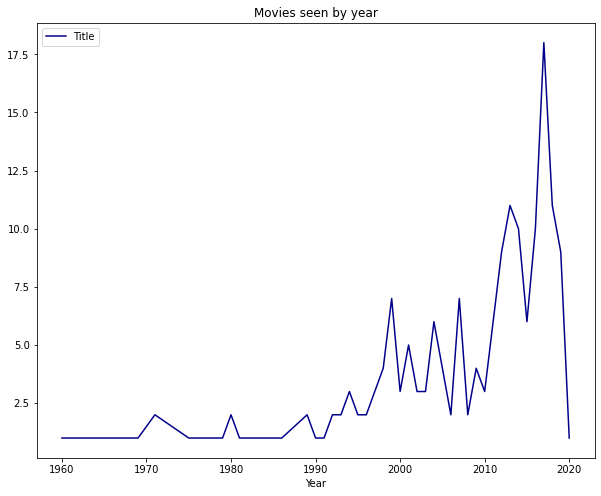

In [536]:
# Get movies seen of  year, create new data frame
da_movie_yr = pd.DataFrame(da_movie.groupby('Year').Title.nunique())
da_movie_yr.plot.line(title = 'Movies seen by year',color='DarkBlue',figsize=(10, 8));

In [537]:
da_movie_yr['year']=da_movie_yr.index
da_movie_yr.reset_index(drop=True,inplace=True)
da_movie_yr.head()



,Title,year
0,1,1960
1,1,1964
2,1,1967
3,1,1968
4,1,1969


In [0]:
labels = list(da_movie_yr['year'].unique())

In [0]:
x_pos = np.arange(len(labels))

In [0]:
count = list(da_movie_yr['Title'])

In [0]:
from matplotlib.cm import ScalarMappable

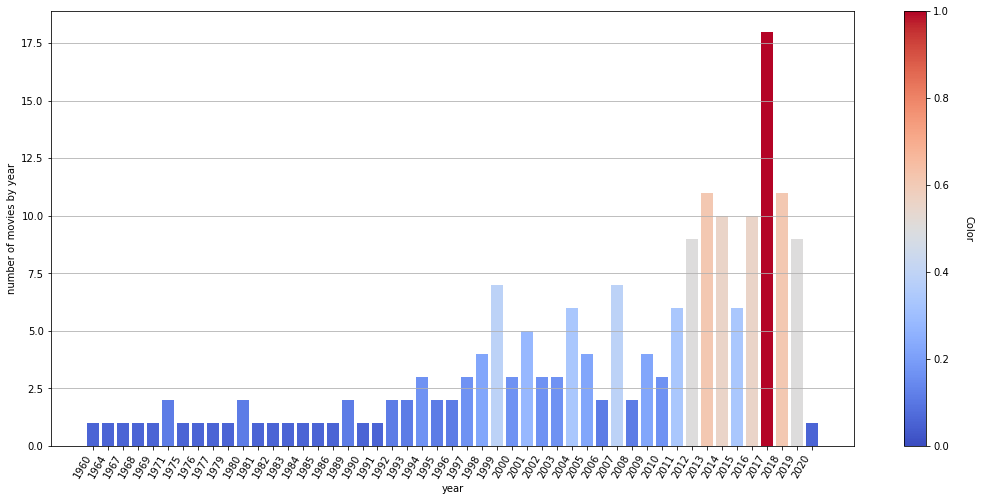

In [542]:
data_color = [x/max(count) for x in count]
my_cmap = plt.cm.get_cmap('coolwarm')
colors = my_cmap(data_color)
fig, ax = plt.subplots()
barlist=ax.bar(x_pos, count, align='center', ecolor='black', capsize=10,color=colors)
fig.set_size_inches(18,8)
ax.set_ylabel('number of movies by year')
ax.set_xlabel('year')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, rotation=60, ha="right")
ax.yaxis.grid(True)
ax.xaxis.grid(False)
sm = ScalarMappable(cmap=my_cmap)
sm.set_array([])

cbar = plt.colorbar(sm)
cbar.set_label('Color', rotation=270,labelpad=25)
from google.colab import files
plt.savefig('movies_by_yr.pdf')
files.download('movies_by_yr.pdf')

In [543]:
df_obj = pd.DataFrame(da_movie['Genres'])
df_obj

,Genres
0,Comedy
0,Drama
0,Romance
1,Biography
1,Drama
...,...
226,Crime
226,Drama
227,Biography
227,Crime


In [544]:
da_movie[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [0]:
da_movies_genres = (pd.DataFrame(da_movie.groupby('Genres').Title.nunique())).sort_values('Title',ascending=False)

In [546]:
da_movies_genres.head()

,Title
Genres,
Drama,108
Adventure,64
Action,59
Sci-Fi,50
Thriller,42


In [547]:
da_movies_genres['genres']=da_movies_genres.index
da_movies_genres.reset_index(drop=True,inplace=True)
da_movies_genres.head()


,Title,genres
0,108,Drama
1,64,Adventure
2,59,Action
3,50,Sci-Fi
4,42,Thriller


In [0]:
labels_ = list(da_movies_genres['genres'].unique())

In [0]:
x_pos_ = np.arange(len(labels_))
count_ = list(da_movies_genres['Title'])

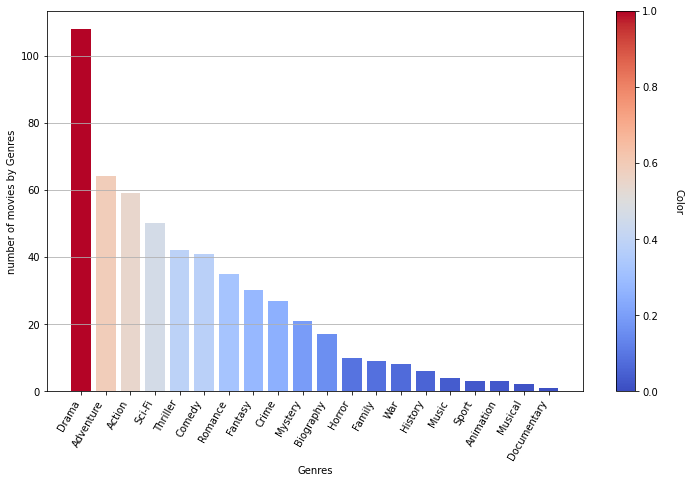

In [550]:
data_color_ = [x/max(count_) for x in count_]
my_cmap_ = plt.cm.get_cmap('coolwarm')
colors_ = my_cmap_(data_color_)
fig, ax = plt.subplots()
barlist=ax.bar(x_pos_, count_, align='center', ecolor='black', capsize=10,color=colors_)
fig.set_size_inches(12,7)
ax.set_ylabel('number of movies by Genres')
ax.set_xlabel('Genres')
ax.set_xticks(x_pos_)
ax.set_xticklabels(labels_, rotation=60, ha="right")
ax.yaxis.grid(True)
ax.xaxis.grid(False)
sm_ = ScalarMappable(cmap=my_cmap_)
sm_.set_array([])

cbar = plt.colorbar(sm_)
cbar.set_label('Color', rotation=270,labelpad=25)
from google.colab import files
plt.savefig('movies_genres.pdf')
files.download('movies_genres.pdf')

In [551]:
da_movie['Genres'].unique()

array(['Comedy', 'Drama', 'Romance', 'Biography', 'Thriller', 'Crime',
       'History', 'Mystery', 'Action', 'Adventure', 'Sci-Fi', 'War',
       'Sport', 'Fantasy', 'Horror', 'Family', 'Documentary', 'Animation',
       'Music', 'Musical'], dtype=object)

In [0]:
#lola=da_movie[da_movie['Genres'].str.contains(' ')]

In [0]:
da_movies_genres.set_index('genres', drop=True,inplace=True)

In [0]:
watch_type = (pd.DataFrame(da.groupby('Title Type').Title.nunique())).sort_values('Title',ascending=False)

In [555]:
watch_type

,Title
Title Type,
movie,181
tvSeries,44


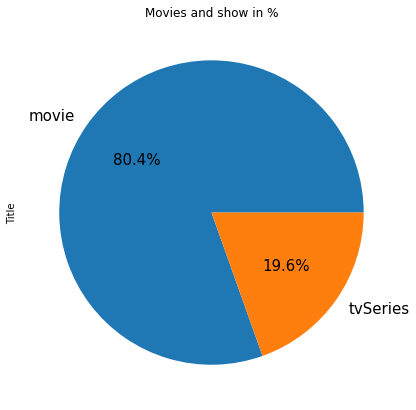

In [556]:
watch_type['Title'].plot.pie(title= 'Movies and show in %', figsize=(7,7), autopct='%1.1f%%',fontsize=15);
from google.colab import files
plt.savefig('tv vs movie.pdf')
files.download('tv vs movie.pdf')

In [557]:
da_movie.head()

,Your Rating,Title,Title Type,IMDb Rating,Runtime (mins),Year,Num Votes,Directors,Genres
0,10,(500) Days of Summer,movie,7.7,95.0,2009,458965,Marc Webb,Comedy
0,10,(500) Days of Summer,movie,7.7,95.0,2009,458965,Marc Webb,Drama
0,10,(500) Days of Summer,movie,7.7,95.0,2009,458965,Marc Webb,Romance
1,9,Argo,movie,7.7,120.0,2012,557346,Ben Affleck,Biography
1,9,Argo,movie,7.7,120.0,2012,557346,Ben Affleck,Drama


In [558]:
da_# = pd.read_csv('/content/ratings.csv', encoding='latin')

,Your Rating,Title,Title Type,IMDb Rating,Runtime (mins),Year,Num Votes,Genres,Directors
0,10,(500) Days of Summer,movie,7.7,95.0,2009,458965,"Comedy, Drama, Romance",Marc Webb
1,9,Argo,movie,7.7,120.0,2012,557346,"Biography, Drama, Thriller",Ben Affleck
2,7,The Silence of the Lambs,movie,8.6,118.0,1991,1212480,"Crime, Drama, Thriller",Jonathan Demme
3,10,Alias Grace,tvSeries,7.8,60.0,2017,22390,"Biography, Crime, Drama, Thriller",NaN
5,10,Silver Linings Playbook,movie,7.7,122.0,2012,644436,"Comedy, Drama, Romance",David O. Russell
...,...,...,...,...,...,...,...,...,...
223,10,J'ai perdu mon corps,movie,7.6,81.0,2019,21209,"Animation, Drama, Fantasy, Romance",Jérémy Clapin
224,9,Taare Zameen Par,movie,8.4,165.0,2007,156833,"Drama, Family","Aamir Khan, Amole Gupte"
225,10,Seinfeld,tvSeries,8.8,22.0,1989,241558,Comedy,NaN
226,10,The Wolf of Wall Street,movie,8.2,180.0,2013,1115426,"Biography, Crime, Drama",Martin Scorsese


In [0]:
da_['duration']=pd.to_numeric(da_['Runtime (mins)'])


In [560]:
da_['Title Type'].unique()

array(['movie', 'tvSeries'], dtype=object)

In [0]:
da_movie_=da_[da_['Title Type']=='movie']

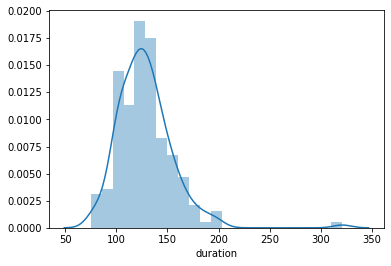

In [562]:
sns.distplot(da_movie_['duration'])
from google.colab import files
plt.savefig('movie_dur.pdf')
files.download('movie_dur.pdf')

In [563]:
da_movie_['duration'].describe()

count    181.000000
mean     128.342541
std       27.857052
min       75.000000
25%      109.000000
50%      126.000000
75%      140.000000
max      321.000000
Name: duration, dtype: float64

In [564]:
da_movie_[da_movie_['duration']==da_movie_['duration'].min()]

,Your Rating,Title,Title Type,IMDb Rating,Runtime (mins),Year,Num Votes,Genres,Directors,duration
95,10,Justice League Dark,movie,7.1,75.0,2017,19394,"Animation, Action, Adventure, Family, Fantasy,...",Jay Oliva,75.0


In [565]:
da_movie_[da_movie_['duration']==da_movie_['duration'].max()]

,Your Rating,Title,Title Type,IMDb Rating,Runtime (mins),Year,Num Votes,Genres,Directors,duration
75,10,Gangs of Wasseypur,movie,8.2,321.0,2012,75363,"Action, Crime, Drama, Thriller",Anurag Kashyap,321.0


In [566]:
da[['Your Rating','IMDb Rating']].corr()

,Your Rating,IMDb Rating
Your Rating,1.000000,0.229332
IMDb Rating,0.229332,1.000000


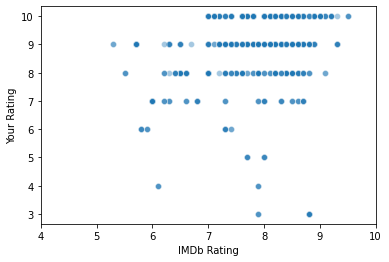

In [567]:
fig, ax = plt.subplots()
sns.scatterplot(y='Your Rating',x='IMDb Rating',data=da, alpha=0.4)
ax.set_xlim([4,10])
from google.colab import files
plt.savefig('my_rating_vs_imdb.pdf')
files.download('my_rating_vs_imdb.pdf')


In [0]:
da_['Rating_jittered'] = da_['Your Rating'] + 0.3 * np.random.rand(len(da_['Your Rating']))

In [646]:
da_[['Rating_jittered','Your Rating']]

,Rating_jittered,Your Rating
0,10.119750,10
1,9.132510,9
2,7.118807,7
3,10.007770,10
5,10.244290,10
...,...,...
223,10.208553,10
224,9.125402,9
225,10.233535,10
226,10.005928,10


In [647]:
da_['Title Type'].unique()

array(['movie', 'tvSeries'], dtype=object)

In [0]:
da_['title_type_num'] = da_['Title Type'].replace({'movie':1,'tvSeries':2})

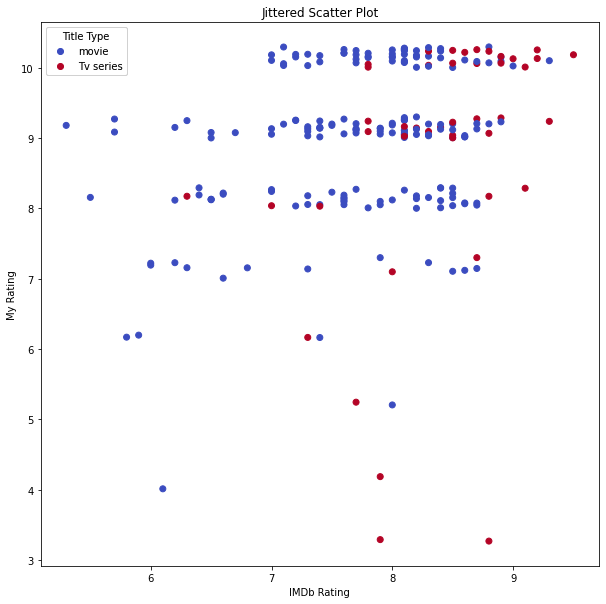

In [650]:
import matplotlib.cm as cm
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
scatter = ax.scatter(da_['IMDb Rating'], da_['Rating_jittered'] , c=da_['title_type_num'], marker='o',cmap=cm.coolwarm)
ax.set_xlabel('IMDb Rating')
ax.set_ylabel('My Rating')
ax.set_title('Jittered Scatter Plot')
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(), title="Title Type")
legend1.get_texts()[0].set_text('movie')
legend1.get_texts()[1].set_text('Tv series')
ax.add_artist(legend1)
from google.colab import files
plt.savefig('jitter_.pdf')
files.download('jitter_.pdf')

In [0]:
director_type = (pd.DataFrame(da.groupby('Directors').Title.nunique())).sort_values('Title',ascending=False)

In [574]:
director_type = director_type.head(15)
director_type

,Title
Directors,
Steven Spielberg,7
Christopher Nolan,6
Stanley Kubrick,5
Francis Lawrence,4
Richard Linklater,4
Martin Scorsese,4
Zack Snyder,3
J.J. Abrams,3
Ridley Scott,3


In [575]:
director_type['directors']=director_type.index
director_type.reset_index(drop=True,inplace=True)
director_type.head()


,Title,directors
0,7,Steven Spielberg
1,6,Christopher Nolan
2,5,Stanley Kubrick
3,4,Francis Lawrence
4,4,Richard Linklater


In [0]:
labels_ = list(director_type['directors'].unique())
x_pos_ = np.arange(len(labels_))
count_ = list(director_type['Title'])

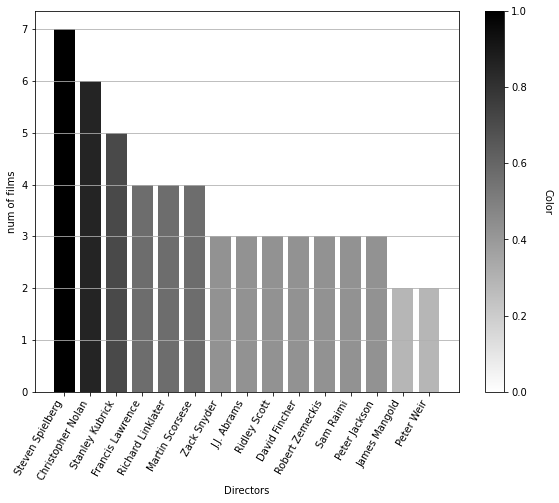

In [577]:
data_color_ = [x/max(count_) for x in count_]
my_cmap_ = plt.cm.get_cmap('binary')
colors_ = my_cmap_(data_color_)
fig, ax = plt.subplots()
barlist=ax.bar(x_pos_, count_, align='center', ecolor='black', capsize=10,color=colors_)
fig.set_size_inches(9.5,7)
ax.set_ylabel('num of films')
ax.set_xlabel('Directors')
ax.set_xticks(x_pos_)
ax.set_xticklabels(labels_, rotation=60, ha="right")
ax.yaxis.grid(True)
ax.xaxis.grid(False)
sm_ = ScalarMappable(cmap=my_cmap_)
sm_.set_array([])

cbar = plt.colorbar(sm_)
cbar.set_label('Color', rotation=270,labelpad=25)
from google.colab import files
plt.savefig('directors_.pdf')
files.download('directors_.pdf')

In [581]:
da_movie_.columns

Index(['Your Rating', 'Title', 'Title Type', 'IMDb Rating', 'Runtime (mins)',
       'Year', 'Num Votes', 'Genres', 'Directors', 'duration'],
      dtype='object')

In [583]:
da_movie_.sort_values(by=['Num Votes'],ascending=False,inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
# Top 15 most popular movies in my list
movie_15 = da_movie_.head(15)

In [587]:
movie_15

,Your Rating,Title,Title Type,IMDb Rating,Runtime (mins),Year,Num Votes,Genres,Directors,duration
13,10,The Shawshank Redemption,movie,9.3,142.0,1994,2238830,Drama,Frank Darabont,142.0
153,10,The Dark Knight,movie,9.0,152.0,2008,2208881,"Action, Crime, Drama, Thriller",Christopher Nolan,152.0
40,10,Fight Club,movie,8.8,139.0,1999,1781767,Drama,David Fincher,139.0
12,10,Pulp Fiction,movie,8.9,154.0,1994,1754160,"Crime, Drama",Quentin Tarantino,154.0
11,10,Forrest Gump,movie,8.8,142.0,1994,1726089,"Drama, Romance",Robert Zemeckis,142.0
37,8,The Matrix,movie,8.7,136.0,1999,1606770,"Action, Sci-Fi","Lilly Wachowski, Lana Wachowski",136.0
32,9,The Lord of the Rings: The Fellowship of the Ring,movie,8.8,178.0,2001,1596477,"Action, Adventure, Drama, Fantasy",Peter Jackson,178.0
55,9,The Lord of the Rings: The Return of the King,movie,8.9,201.0,2003,1583192,"Adventure, Drama, Fantasy",Peter Jackson,201.0
39,10,The Dark Knight Rises,movie,8.4,164.0,2012,1460735,"Action, Adventure",Christopher Nolan,164.0
56,9,The Lord of the Rings: The Two Towers,movie,8.7,179.0,2002,1430220,"Adventure, Drama, Fantasy",Peter Jackson,179.0


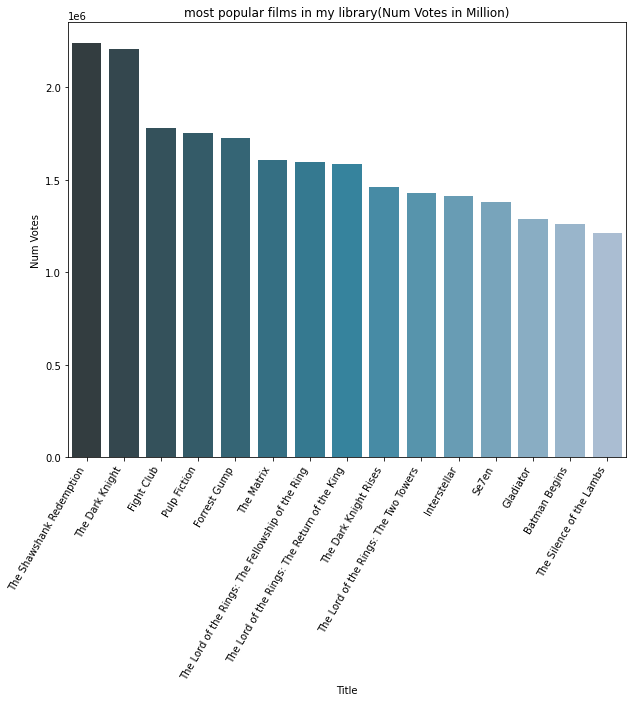

In [599]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x='Title', y='Num Votes', data=movie_15, palette="PuBuGn_d")
label = list(movie_15['Title'])
ax.set_title('most popular films in my library(Num Votes in Million)')
_ = ax.set_xticklabels(label, rotation=60, ha="right")
from google.colab import files
plt.savefig('popularity.pdf')
files.download('popularity.pdf')

In [602]:
tv = da_[da_['Title Type']=='tvSeries']
tv.shape

(44, 10)

In [603]:
tv.sort_values(by=['Num Votes'],ascending=False,inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
# Top 15 most popular series in my list
tv_15 = tv.head(15)

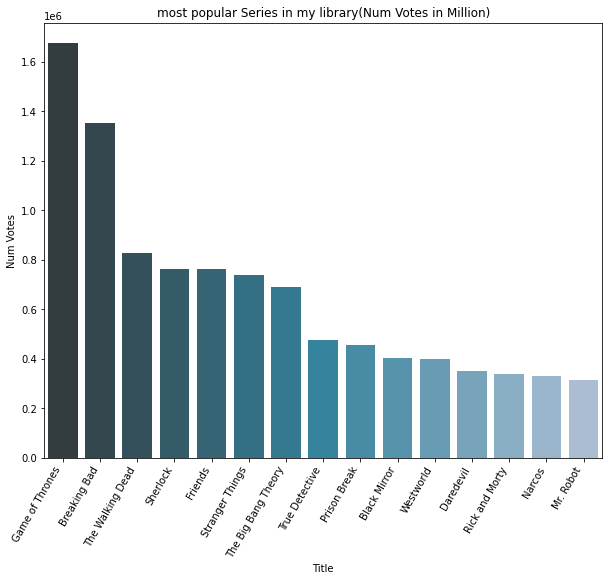

In [605]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x='Title', y='Num Votes', data=tv_15, palette="PuBuGn_d")
label = list(tv_15['Title'])
ax.set_title('most popular Series in my library(Num Votes in Million)')
_ = ax.set_xticklabels(label, rotation=60, ha="right")
from google.colab import files
plt.savefig('popularity_tv.pdf')
files.download('popularity_tv.pdf')

In [609]:
da_['Title Type'].unique()

array(['movie', 'tvSeries'], dtype=object)

In [610]:
da_['IMDb Rating'].corr(da_['Num Votes'])

0.484445854596323

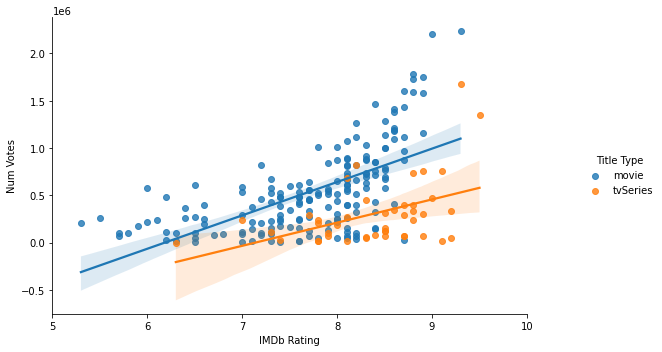

In [643]:
sns.lmplot(x='IMDb Rating', y='Num Votes', data=da_, hue='Title Type')
fig = plt.gcf()
ax = plt.gca()
ax.set_xlim(5,10)
fig.set_size_inches(10,5)
from google.colab import files
plt.savefig('rating vs pop.pdf')
files.download('rating vs pop.pdf')

In [644]:
da

,Your Rating,Title,Title Type,IMDb Rating,Runtime (mins),Year,Num Votes,Directors,Genres,Rating_jittered,title_type_num
0,10,(500) Days of Summer,movie,7.7,95.0,2009,458965,Marc Webb,Comedy,10.044817,1
0,10,(500) Days of Summer,movie,7.7,95.0,2009,458965,Marc Webb,Drama,10.252713,1
0,10,(500) Days of Summer,movie,7.7,95.0,2009,458965,Marc Webb,Romance,10.075484,1
1,9,Argo,movie,7.7,120.0,2012,557346,Ben Affleck,Biography,9.288814,1
1,9,Argo,movie,7.7,120.0,2012,557346,Ben Affleck,Drama,9.093444,1
...,...,...,...,...,...,...,...,...,...,...,...
226,10,The Wolf of Wall Street,movie,8.2,180.0,2013,1115426,Martin Scorsese,Crime,10.223088,1
226,10,The Wolf of Wall Street,movie,8.2,180.0,2013,1115426,Martin Scorsese,Drama,10.253238,1
227,8,Goodfellas,movie,8.7,146.0,1990,973996,Martin Scorsese,Biography,8.158846,1
227,8,Goodfellas,movie,8.7,146.0,1990,973996,Martin Scorsese,Crime,8.043110,1


In [651]:
da_

,Your Rating,Title,Title Type,IMDb Rating,Runtime (mins),Year,Num Votes,Genres,Directors,duration,Rating_jittered,title_type_num
0,10,(500) Days of Summer,movie,7.7,95.0,2009,458965,"Comedy, Drama, Romance",Marc Webb,95.0,10.119750,1
1,9,Argo,movie,7.7,120.0,2012,557346,"Biography, Drama, Thriller",Ben Affleck,120.0,9.132510,1
2,7,The Silence of the Lambs,movie,8.6,118.0,1991,1212480,"Crime, Drama, Thriller",Jonathan Demme,118.0,7.118807,1
3,10,Alias Grace,tvSeries,7.8,60.0,2017,22390,"Biography, Crime, Drama, Thriller",NaN,60.0,10.007770,2
5,10,Silver Linings Playbook,movie,7.7,122.0,2012,644436,"Comedy, Drama, Romance",David O. Russell,122.0,10.244290,1
...,...,...,...,...,...,...,...,...,...,...,...,...
223,10,J'ai perdu mon corps,movie,7.6,81.0,2019,21209,"Animation, Drama, Fantasy, Romance",Jérémy Clapin,81.0,10.208553,1
224,9,Taare Zameen Par,movie,8.4,165.0,2007,156833,"Drama, Family","Aamir Khan, Amole Gupte",165.0,9.125402,1
225,10,Seinfeld,tvSeries,8.8,22.0,1989,241558,Comedy,NaN,22.0,10.233535,2
226,10,The Wolf of Wall Street,movie,8.2,180.0,2013,1115426,"Biography, Crime, Drama",Martin Scorsese,180.0,10.005928,1
